# Modelling spreading of enfectious diseases
This is an experimental model made in a few hours. Inspirered by https://triplebyte.com/blog/modeling-infectious-diseases. 

The model is purely for testing the capabilities of ModelFlow 

In [1]:
import pandas as pd
from ipywidgets import interact,Dropdown,Checkbox,Layout,FloatSlider

from modelsandbox import newmodel
import modelclass as mc
import modelmanipulation as mp 
from modeljupyter import inputwidget

This model has simultaneous elements or cyclical elements.


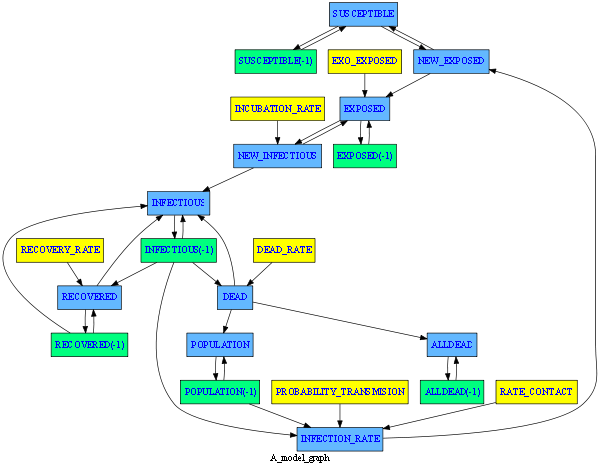

In [2]:
DAYS = 200

# Specify Model 
rcorona = '''\
             infection_rate        = rate_contact * probability_transmision * infectious(-1) / population(-1) 
             new_exposed           = infection_rate * susceptible
             diff(exposed)         = new_exposed - new_infectious + exo_exposed

             new_infectious        = incubation_rate * exposed 
             diff(infectious)      = new_infectious - diff(recovered) - dead

             diff(susceptible)     = -new_exposed  

             diff(recovered)       = recovery_rate * infectious(-1)

             dead                  = dead_rate * infectious(-1)
             diff(alldead)         = dead
             diff(population)      = -dead
             
'''

# create a model instance 
fcorona = mp.explode(rcorona)
mcorona = newmodel(fcorona)
mcorona.drawmodel(lag=1,size=(2,2))

In [3]:
basedf = pd.DataFrame(index=range(DAYS))    # make an empty dataframe with DAYS rows
grunddf = mc.insertModelVar(basedf,mcorona) # fill dataframe with zeros 
grunddf.loc[0,'POPULATION']= 1000000
grunddf['SUSCEPTIBLE'] = grunddf['POPULATION']

res1 = mcorona(grunddf,antal=20,first_test=10,silent=1)

Generating source for testmodel using ljit = False 
make model text started at :        09:30:25 
make model text took       :    0.0000000000 Seconds


In [4]:
cow = inputwidget(mcorona,grunddf,modelopt={'silent':0},
                  slidedef = {
                     'Number of infected t=1'     :{'var' : 'EXO_EXPOSED','min' : 0.0, 'max' : 1000, 'value' : 0.0,'step':10,'op':'+impulse'},
                     'Rate of contact'            :{'var' : 'RATE_CONTACT','min' : 0.0, 'max' : 100, 'value' : 1,'step':1},
                     'Probability of transmission':{'var' : 'PROBABILITY_TRANSMISION','min' : 0.0, 'max' : 1.0, 'value' : 0.2},
                     'Daily incuberation rate'    :{'var' : 'INCUBATION_RATE','min' : 0.0, 'max' : 1.0, 'value' : 0.3},
                     'Daily death rate'           :{'var' : 'DEAD_RATE','min' : 0.0, 'max' : 1.0, 'value' : 0.2},
                     'Daily recovery rate'        :{'var' : 'RECOVERY_RATE','min' : 0.0, 'max' : 1.0, 'value' : 0.2}
                             },
                 varpat='#endo')

display(cow)